In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import warnings
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
import statsmodels.api as sm

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
# https://gist.github.com/AdamSpannbauer/c99c366b0c7d5b6c4920a46c32d738e5


def print_vif(x):
    """Utility for checking multicollinearity assumption

    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("2020.csv")

<IPython.core.display.Javascript object>

# Let's do some quick EDA

In [5]:
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


<IPython.core.display.Javascript object>

In [6]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

<IPython.core.display.Javascript object>

In [8]:
df.isna().mean()

Country name                                  0.0
Regional indicator                            0.0
Ladder score                                  0.0
Standard error of ladder score                0.0
upperwhisker                                  0.0
lowerwhisker                                  0.0
Logged GDP per capita                         0.0
Social support                                0.0
Healthy life expectancy                       0.0
Freedom to make life choices                  0.0
Generosity                                    0.0
Perceptions of corruption                     0.0
Ladder score in Dystopia                      0.0
Explained by: Log GDP per capita              0.0
Explained by: Social support                  0.0
Explained by: Healthy life expectancy         0.0
Explained by: Freedom to make life choices    0.0
Explained by: Generosity                      0.0
Explained by: Perceptions of corruption       0.0
Dystopia + residual                           0.0


<IPython.core.display.Javascript object>

Below, I'm looking at values that highly correlated with the ladder score and selecting the most relevant to put into my model.

In [9]:
np.abs(round(df.iloc[:, 1:].corr().loc[:, "Ladder score"], 4)).sort_values(
    ascending=False
)

Ladder score                                  1.0000
upperwhisker                                  0.9996
lowerwhisker                                  0.9996
Explained by: Log GDP per capita              0.7754
Logged GDP per capita                         0.7754
Healthy life expectancy                       0.7703
Explained by: Healthy life expectancy         0.7703
Explained by: Social support                  0.7650
Social support                                0.7650
Explained by: Freedom to make life choices    0.5906
Freedom to make life choices                  0.5906
Dystopia + residual                           0.4803
Standard error of ladder score                0.4464
Explained by: Perceptions of corruption       0.4183
Perceptions of corruption                     0.4183
Explained by: Generosity                      0.0690
Generosity                                    0.0690
Ladder score in Dystopia                      0.0000
Name: Ladder score, dtype: float64

<IPython.core.display.Javascript object>

In [10]:
n_df = df[
    [
        "Ladder score",
        "Logged GDP per capita",
        "Healthy life expectancy",
        "Social support",
        "Freedom to make life choices",
    ]
]

<IPython.core.display.Javascript object>

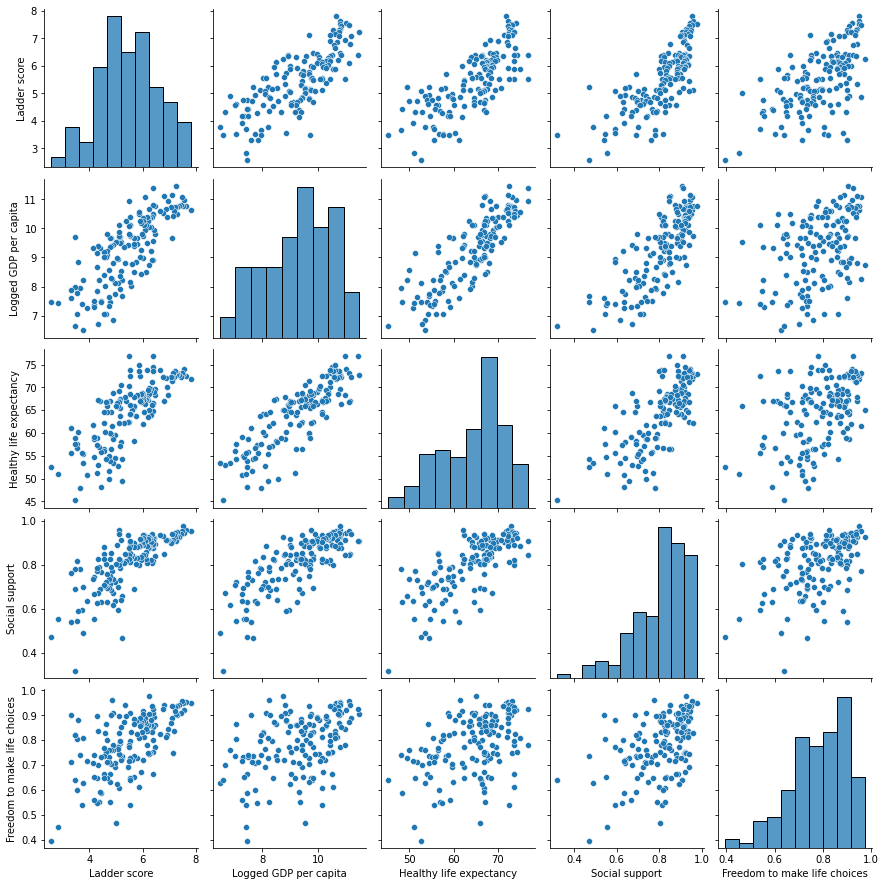

<IPython.core.display.Javascript object>

In [11]:
sns.pairplot(n_df)

In [12]:
X = df[
    [
        "Logged GDP per capita",
        "Healthy life expectancy",
        "Social support",
        "Freedom to make life choices",
        "Country name",
    ]
]

y = df["Ladder score"]

<IPython.core.display.Javascript object>

In [13]:
X.head()

,Logged GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Country name
0,10.639267,71.900825,0.954330,0.949172,Finland
1,10.774001,72.402504,0.955991,0.951444,Denmark
2,10.979933,74.102448,0.942847,0.921337,Switzerland
3,10.772559,73.000000,0.974670,0.948892,Iceland
4,11.087804,73.200783,0.952487,0.955750,Norway


<IPython.core.display.Javascript object>

In [14]:
cat_cols = ["Country name"]

<IPython.core.display.Javascript object>

In [15]:
# encode country name
preprocessing = ColumnTransformer(
    [
        ("encode_cats", LeaveOneOutEncoder(), cat_cols),
        # ('encode_cats', OneHotEncoder(drop=drop_cats), cat_cols),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=94
)

<IPython.core.display.Javascript object>

In [17]:
preprocessing.fit(X_train, y_train)

X_train = pd.DataFrame(
    preprocessing.transform(X_train), index=X_train.index, columns=X_train.columns
)
X_test = pd.DataFrame(
    preprocessing.transform(X_test), index=X_test.index, columns=X_train.columns
)

<IPython.core.display.Javascript object>

In [18]:
grid = {
    "max_depth": [2, 3],
    "min_samples_leaf": [0.1, 1, 50, 75],
}

<IPython.core.display.Javascript object>

# Decision Tree Regression Model

In [19]:
model = GridSearchCV(DecisionTreeRegressor(), grid, cv=5, verbose=1, n_jobs=-1)

<IPython.core.display.Javascript object>

In [20]:
model.fit(X_train, y_train)
model.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    6.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.5s finished


{'max_depth': 3, 'min_samples_leaf': 0.1}

<IPython.core.display.Javascript object>

In [21]:
print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

train score: 0.7808414050375772
test score: 0.6859666265933031


<IPython.core.display.Javascript object>

# Random Forest Regression models.

In [22]:
grid = {
    "n_estimators": [25, 50, 100],
    "max_depth": [2, 3],
    "min_samples_leaf": [0.1, 1, 50, 75],
}

<IPython.core.display.Javascript object>

In [23]:
model = GridSearchCV(RandomForestRegressor(), grid, cv=5, verbose=1, n_jobs=-1)

<IPython.core.display.Javascript object>

In [24]:
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3],
                         'min_samples_leaf': [0.1, 1, 50, 75],
                         'n_estimators': [25, 50, 100]},
             verbose=1)

<IPython.core.display.Javascript object>

In [25]:
model.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 100}

<IPython.core.display.Javascript object>

In [26]:
print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

train score: 0.8625001954037522
test score: 0.7594510094980653


<IPython.core.display.Javascript object>

This model is very over fit. 

Since this data is so linear, a linear regression model of some sort would likely be better suited. 

In [27]:
best_model = model.best_estimator_
best_model.feature_importances_

array([0.        , 0.21645017, 0.19724153, 0.53075988, 0.05554841])

<IPython.core.display.Javascript object>

In [28]:
selector = SelectFromModel(RandomForestRegressor(), max_features=3)
selector.fit(X_train, y_train)
X_train.loc[:, selector.get_support()].head()

,Healthy life expectancy,Freedom to make life choices
24,10.775685,0.894309
114,8.576625,0.737217
131,9.162674,0.770290
21,10.533838,0.930380
80,9.412187,0.937142


<IPython.core.display.Javascript object>

In [29]:
print_vif(X_train)

VIF results
-------------------------------
Logged GDP per capita           86.971187
Healthy life expectancy          4.640976
Social support                   3.913889
Freedom to make life choices     2.778284
Country name                     1.409972
dtype: float64
-------------------------------



c:\users\matth\appdata\local\programs\python\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


<IPython.core.display.Javascript object>

We ended up over fit on both models, but the Random Forest model had a better performance.